# Form factor functions with detector resolution added

In [1]:
#include "FormFactor_resolution.h"
#include "FormFactor_1D.h"
#include "FormFactor_saturation_data.h"

### These are the parameters for all functions below

In [7]:
double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7;
double q_min = 0, q_max = 0.5, t_min = 0, t_max = 0.25;
double qy_min = 0, qy_max = 0.5, qx_prime_min = 0, qx_prime_max = 0.5;
double ty_min = 0, ty_max = 0.25, tx_prime_min = 0, tx_prime_max = 0.25, bins = 1000; 
double x_min = 0, x_max = 15, y_min = 0, y_max = 15, r_min = 0, r_max = 15;

// Parameters to mess with
double phi_min = 0, phi_max = 2*pi, sigma = 0.01;

// Initialize constructors
FormFactor_1D ff(A,Vo,R,a0,q_min,q_max,t_min,t_max,phi_min,phi_max);
FormFactor_resolution res(A,Vo,R,a0,q_min,q_max,t_min,t_max,phi_min,phi_max,qy_min,qy_max,qx_prime_min,qx_prime_max,ty_min,ty_max,tx_prime_min,tx_prime_max,bins,bins,bins,bins,bins,x_min,x_max,y_min,y_max,r_min,r_max,sigma);

In [9]:
TF1 *ff_q2_res_wedge = res.getFormFactor_wResWedge_q();
    ff_q2_res_wedge->GetYaxis()->SetTitle("|F(q)|^{2}");
    ff_q2_res_wedge->GetXaxis()->SetTitle("q [GeV]");
    ff_q2_res_wedge->Draw();

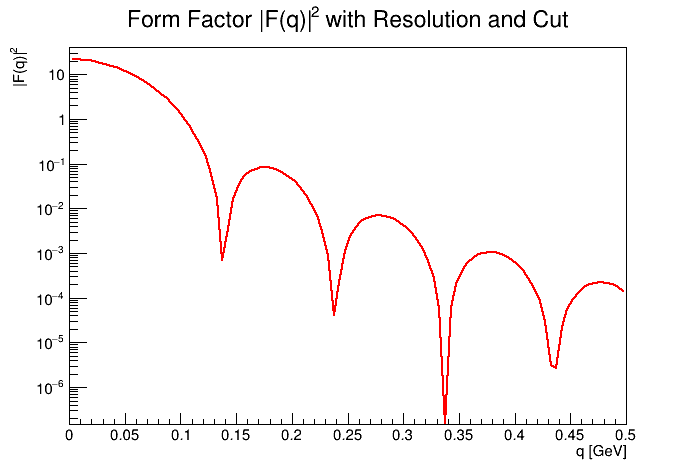

In [10]:
c1->Draw();

In [11]:
TF1 *ff_t2_res_wedge = res.getFormFactor_wResWedge_t();
    ff_t2_res_wedge->GetYaxis()->SetTitle("|F(t)|^{2}");
    ff_t2_res_wedge->GetXaxis()->SetTitle("t [GeV^{2}]"); 
    ff_t2_res_wedge->Draw();

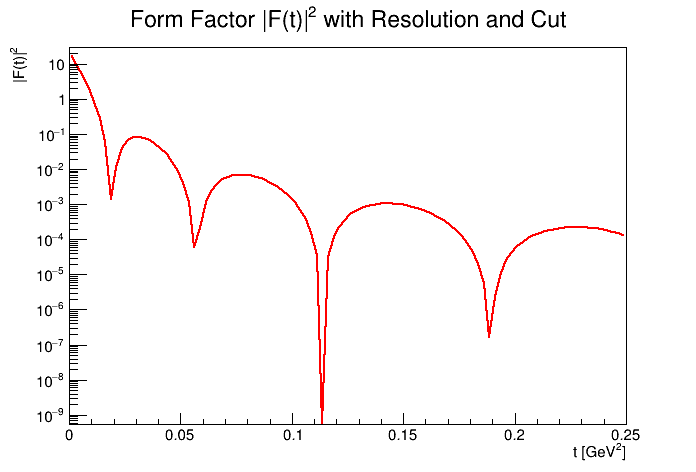

In [12]:
c1->Draw();

In [10]:
TH2D *ff_q2_res = res.create_FormFactorq_2Dcontour("","Smeared Form Factor: |F(q_{x},q_{y})|^{2} (no cut)",bins,qx_prime_min,qx_prime_max,bins,qy_min,qy_max);
    ff_q2_res->GetYaxis()->SetTitle("q_{y} [GeV]");
    ff_q2_res->GetXaxis()->SetTitle("q_{x} [GeV]");
    ff_q2_res->GetZaxis()->SetTitle("|F(q_{x},q_{y})|^{2}");
    ff_q2_res->Draw();

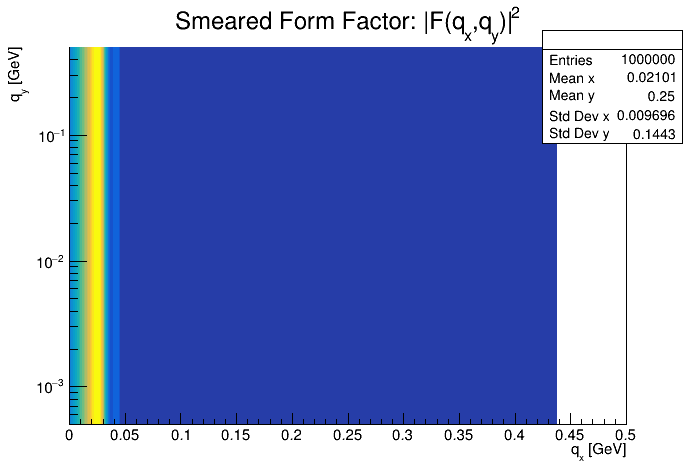

In [11]:
c1->Draw();

In [16]:
TH2D *ff_t2_res = res.create_FormFactort_2Dcontour("","Smeared Form Factor: |F(t_{x},t_{y})|^{2} (no cut)",bins,tx_prime_min,tx_prime_max,bins,ty_min,ty_max);
    ff_t2_res->GetYaxis()->SetTitle("t_{y} [GeV^{2}]");
    ff_t2_res->GetXaxis()->SetTitle("t_{x} [GeV^{2}]");
    ff_t2_res->GetZaxis()->SetTitle("|F(t_{x},t_{y})|^{2}");
    ff_t2_res->ProjectionY()->Draw();
gPad->SetLogy(1);

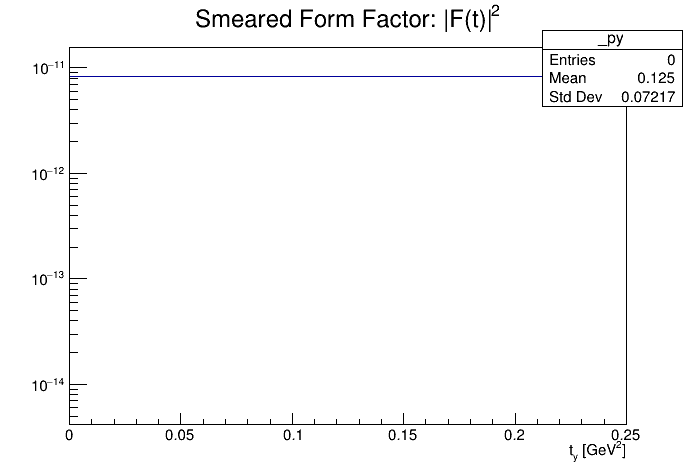

In [17]:
c1->Draw();

## Compare form factor with only wedge cut and with both cut and resolution

In [8]:
TF1 *ff_t2_res_wedge = res.getFormFactor_wResWedge_t();
    ff_t2_res_wedge->GetYaxis()->SetTitle("|F(t)|^{2}");
    ff_t2_res_wedge->GetXaxis()->SetTitle("t [GeV^{2}]"); 
    ff_t2_res_wedge->SetLineColor(kRed);   
    ff_t2_res_wedge->SetLineStyle(1); 
    ff_t2_res_wedge->Draw();
TF1 *ff_t2_wedge = ff.getCutFormFactor_t2();
    ff_t2_wedge->SetLineColor(kBlack); 
    ff_t2_wedge->SetLineStyle(3);    
    ff_t2_wedge->Draw("same");
TLegend *legend = new TLegend(0.55, 0.7, 0.9, 0.9);
    legend->SetHeader("Form Factors", "C"); 
    legend->AddEntry(ff_t2_res_wedge, "with resolution and wedge cut", "l");
    legend->AddEntry(ff_t2_wedge, "wedge cut only", "l");
    legend->Draw();

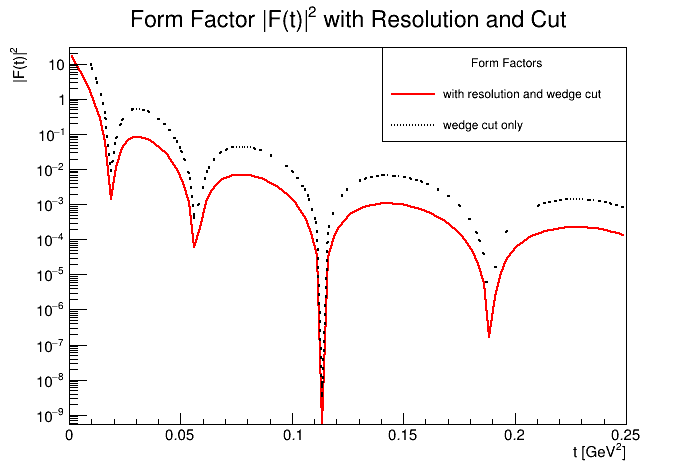

In [9]:
c1->Draw();

## Compare form factor with 5% resolution with $\phi$ saturation model no cut

## Compare form factor with 5% resolution with $\phi$ saturation model with cut

## Compare form factor with 5% resolution with $J/\psi$ saturation model no cut

## Compare form factor with 5% resolution with $J\psi$ saturation model no cut